`[Tip]: To execute the Python code in the code cell below, click on the cell to select it and press Shift + Enter.`

In [1]:
!pip install pydot


In [2]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from itertools import product
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import math
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from six import StringIO  # Fix for StringIO import
from IPython.display import Image
import pydot
from sklearn import metrics

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier


- After executing the cell above, you should see that Python prints `Hello, Neurons` Congratulations on running your Python code!

In [3]:
credit = pd.read_csv("creditCardFraud_28011964_120214.csv")
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


To write comments in Python, use the number symbol `#` before writing your comment. When you run your code, Python will ignore everything past the # on a given line.

In [4]:
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [5]:
credit.nunique()


LIMIT_BAL                      56
SEX                             2
EDUCATION                       6
MARRIAGE                        4
AGE                            44
PAY_0                           8
PAY_2                           9
PAY_3                          10
PAY_4                           8
PAY_5                           8
PAY_6                           8
BILL_AMT1                     904
BILL_AMT2                     875
BILL_AMT3                     863
BILL_AMT4                     846
BILL_AMT5                     833
BILL_AMT6                     821
PAY_AMT1                      522
PAY_AMT2                      520
PAY_AMT3                      496
PAY_AMT4                      482
PAY_AMT5                      480
PAY_AMT6                      436
default payment next month      2
dtype: int64

In [6]:
credit.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,1001.0,167532.467532,130587.921320,10000.0,50000.0,140000.0,240000.0,700000.0
SEX,1001.0,1.589411,0.492187,1.0,1.0,2.0,2.0,2.0
EDUCATION,1001.0,1.776224,0.750916,1.0,1.0,2.0,2.0,6.0
MARRIAGE,1001.0,1.604396,0.532298,0.0,1.0,2.0,2.0,3.0
AGE,1001.0,34.945055,9.219760,21.0,28.0,33.0,41.0,75.0
PAY_0,1001.0,-0.004995,1.173446,-2.0,-1.0,0.0,0.0,8.0
PAY_2,1001.0,-0.161838,1.228732,-2.0,-1.0,0.0,0.0,7.0
PAY_3,1001.0,-0.164835,1.262459,-2.0,-1.0,0.0,0.0,7.0
PAY_4,1001.0,-0.283716,1.184662,-2.0,-1.0,0.0,0.0,7.0
PAY_5,1001.0,-0.283716,1.170224,-2.0,-1.0,0.0,0.0,7.0


In [7]:
credit.rename(columns={"PAY_0": "PAY_1","default.payment.next.month":"default"},inplace=True)

# Aggregating Unknown educations type
education_dict = {2:3,3:2,4:0,5:0,6:0}
credit.EDUCATION.replace(education_dict,inplace=True)

# Adding field names descriptions
credit["SEX_desc"] = credit["SEX"].replace({1: "Male", 2: "Female"})
credit["EDUCATION_desc"] = credit["EDUCATION"].replace({0:"Other",1:"Graduate School", 2:"High School",3:"University"})
credit["MARRIAGE_desc"] = credit["MARRIAGE"].replace({1: "Married", 2: "Single",0:"Other",3:"Other"})
credit["cum_pay"]=credit["PAY_AMT1"]+credit["PAY_AMT2"]+credit["PAY_AMT3"]+credit["PAY_AMT4"]+credit["PAY_AMT5"]
credit["cum_bill"]=(credit["BILL_AMT2"]+credit["BILL_AMT3"]+credit["BILL_AMT4"]+credit["BILL_AMT5"]+credit["BILL_AMT6"])

credit["percent_paid"]=(credit["cum_pay"]/credit["cum_bill"])
(credit["percent_paid"]).replace([np.inf, -np.inf], np.nan,inplace=True)
credit["percent_paid"].fillna(0,inplace=True)
credit["percent_paid"]=round(credit["percent_paid"],2)
#------------------------------------------------------------
# Concatenating all PAY Fields into 1 Field (3\6 months)
credit['con']=credit['PAY_1'].astype(str) +";" +credit['PAY_2'].astype(str)+";" +credit['PAY_3'].astype(str) +";" +credit['PAY_4'].astype(str)+";" +credit['PAY_5'].astype(str)+";" +credit['PAY_6'].astype(str) 
credit['con_3_months'] = credit['PAY_1'].astype(str) +";" +credit['PAY_2'].astype(str)+";" +credit['PAY_3'].astype(str)

delay = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
credit["max_delay"]=credit[delay].max(axis=1)
delay = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
credit["max_delay"]=credit[delay].max(axis=1)

In [8]:
import pandas as pd
import numpy as np

# Assuming 'credit' is your DataFrame

# Roll Payment Status Calculation
roll_dict =  {'1':lambda row: int(row["PAY_1"] == 0),
              '2':lambda row: int(row["PAY_2"] == 0),
              '3':lambda row: int(row["PAY_3"] == 0),
              '4':lambda row: int(row["PAY_4"] == 0),
              '5':lambda row: int(row["PAY_5"] == 0),
              '6':lambda row: int(row["PAY_6"] == 0)}

for k,v in roll_dict.items():
    c = 'Roll_PAY_{}'.format(k)
    credit[c] = credit.apply(v,axis=1)

# Qnt of rolls over 3/6 months
credit['Total_Roll'] =  credit[['Roll_PAY_1', 'Roll_PAY_2', 'Roll_PAY_3', 'Roll_PAY_4', 'Roll_PAY_5', 'Roll_PAY_6']].sum(axis=1)
credit['Three_Months_Roll'] =  credit[['Roll_PAY_1', 'Roll_PAY_2', 'Roll_PAY_3']].sum(axis=1)

# Counting Amount of Delays
Total_Delays = lambda row: int(row["PAY_1"] > 0) + int(row["PAY_2"] > 0) + int(row["PAY_3"] > 0) + int(row["PAY_4"] > 0) + int(row["PAY_5"] > 0) + int(row["PAY_6"] > 0)
Three_Months_Delays = lambda row: int(row["PAY_1"] > 0) + int(row["PAY_2"] > 0) + int(row["PAY_3"] > 0)

credit['Total_Delays'] = credit.apply(Total_Delays,axis=1)
credit['Three_Months_Delays'] = credit.apply(Three_Months_Delays,axis=1)

# Calculating Trends in Payment Status
for k in range(1, 6):
    credit[f'trend_{k}'] = credit[[f'PAY_{i}' for i in range(k+1, 7)]].min(axis=1)

credit['mean_trend'] = credit[[f'trend_{k}' for k in range(1, 6)]].mean(axis=1)
credit['mean_trend_3_months'] = credit[['trend_1', 'trend_2']].mean(axis=1)

# Deviations of Last 3/6 months
credit['Deviation'] = credit[[f'BILL_AMT{i}' for i in range(1, 7)]].sum(axis=1) / (credit['LIMIT_BAL'] * 6)
credit['Deviation_3_months'] = credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3']].sum(axis=1) / (credit['LIMIT_BAL'] * 3)

# Ratio between Payment and Bill
for i in range(1, 6):
    credit[f'Pay_from_Bill_{i}'] = credit[f'PAY_AMT{i}'] / credit[f'BILL_AMT{i+1}']
    credit[f'Pay_from_Bill_{i}'].replace([np.inf, -np.inf], np.nan, inplace=True)
    credit[f'Pay_from_Bill_{i}'].fillna(0, inplace=True)

credit['mean_pay_from_Bill'] = credit[[f'Pay_from_Bill_{i}' for i in range(1, 6)]].mean(axis=1)

# Counting Times Paid Less Than Bill
count_out_of_bill = lambda row: sum(row[f'Pay_from_Bill_{i}'] < 1 for i in range(1, 6))
count_out_of_bill_3_months = lambda row: sum(row[f'Pay_from_Bill_{i}'] < 1 for i in range(1, 4))

credit['count_out_of_bill'] = credit.apply(count_out_of_bill, axis=1)
credit['count_out_of_bill_3_months'] = credit.apply(count_out_of_bill_3_months, axis=1)

# Replacing Infinite or NaN Values
credit.replace([np.inf, -np.inf], np.nan, inplace=True)
credit.fillna(0, inplace=True)

# Changing Education Values
education_dict = {2: 3, 3: 2, 4: 0, 5: 0, 6: 0}
credit['EDUCATION'].replace(education_dict, inplace=True)


In [9]:
import pandas as pd
import numpy as np

# Define the function to identify rows with no bill
def no_bill(row):
    if ((row['BILL_AMT1'] == 0) & (row['BILL_AMT2'] == 0) & (row['BILL_AMT3'] == 0) & 
        (row['BILL_AMT4'] == 0) & (row['BILL_AMT5'] == 0) & (row['BILL_AMT6'] == 0)):
        return 1
    else:
        return 0

# Create a new column to identify rows with no bill
credit['no_bill_flag'] = credit.apply(no_bill, axis=1)
credit['no_bill_flag'].value_counts()

# Define the function to calculate total bills
def total_bills(row):
    return row[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum()

# Create a new column to calculate total bills
credit['total_bills'] = credit.apply(total_bills, axis=1)

# Define the function to identify rows with total bills lower than zero
def total_bills_flag(row):
    if row['total_bills'] < 0:
        return 1
    else:
        return 0

# Create a new column to identify rows with total bills lower than zero
credit['total_bills_flag'] = credit.apply(total_bills_flag, axis=1)

# Drop unnecessary columns
credit.drop(['total_bills'], axis=1, inplace=True)

# Define the function to identify rows with percent paid less than zero
def percent_paid_flag(row):
    if row['percent_paid'] < 0:
        return 1
    else:
        return 0

# Create a new column to identify rows with percent paid less than zero
credit['percent_paid_flag'] = credit.apply(percent_paid_flag, axis=1)

# Define the function to identify rows with percent paid greater than one
def percent_paid_high_flag(row):
    if row['percent_paid'] > 1:
        return 1
    else:
        return 0

# Create a new column to identify rows with percent paid greater than one
credit['percent_paid_high_flag'] = credit.apply(percent_paid_high_flag, axis=1)

# Drop the 'group' column if it exists
if 'group' in credit.columns:
    credit.drop(['group'], axis=1, inplace=True)


In [10]:
dict_convert={0:1,-2:1.3,-1:1.4,1:2.5,2:3,3:6,4:6,5:6,6:6,7:6,8:6}

credit['PAY_LM'] = credit['PAY_1']
credit.PAY_LM.replace(dict_convert,inplace=True)

for i in range(1,7):
  def metric_prep(row):
    a = {v for k, v in dict_convert.items() if row.loc['PAY_{}'.format(i)] == k}
    a = str(a)
    return float(a.replace('{','').replace('}',''))
  credit['metric_prep_{}'.format(i)] = credit.apply(metric_prep,axis=1)
  
# 2. Creating unique data frame with all combinations of PAY fields
unique_values = credit[['metric_prep_1','metric_prep_2','metric_prep_3','metric_prep_4','metric_prep_5','metric_prep_6']].drop_duplicates()
unique_values['Rate_key'] =  unique_values['metric_prep_1'].astype(str) +";" +unique_values['metric_prep_2'].astype(str) +";" +unique_values['metric_prep_3'].astype(str) +";" +unique_values['metric_prep_4'].astype(str) +";" +unique_values['metric_prep_5'].astype(str) +";" +unique_values['metric_prep_6'].astype(str)
credit['Rate_key']=credit['metric_prep_1'].astype(str) +";" +credit['metric_prep_2'].astype(str)+";" +credit['metric_prep_3'].astype(str) +";" +credit['metric_prep_4'].astype(str)+";" +credit['metric_prep_5'].astype(str)+";" +credit['metric_prep_6'].astype(str) 

# 3. Taking the main combinations (with most of the data) and use them as comparison group
rate1 = [1,1,1,1,1,1]             #  0 0 0 0 0 0 10.4%  9821 obs
rate2 = [1.3,1.3,1.3,1.3,1.3,1.3] # -2-2-2-2-2-2 13.4%  2109 obs
rate3 = [1.4,1.4,1.4,1.4,1.4,1.4] # -1-1-1-1-1-1 14.2%  1992 obs
rate4 = [2.5,1.3,1.3,1.3,1.3,1.3] # 1-2-2-2-2-2  36%     651 obs
rate5 = [5,5,5,5,5,5]             # 2 2 2 2 2 2  77.5%   530 obs

# 4. Using euclidean distance metric + weights over months
weights = [6/21,5/21,4/21,3/21,2/21,1/21]

def euclidean_distance(pt1,pt2):
  distance = 0
  for i,j in zip(range(len(pt1)),weights) :
    distance += j * (pt1[i] - pt2[i]) ** 2
  return distance ** 0.5  
  return distance

# 5. Converting unique_values df into list and than running each row and comparing it combination to the 5 ratings.
# We'll take the closest rate by using min func (the min distnace) and than tag the row to the closest rate
s=[]
for row in unique_values.values.tolist():
  Rate_1 = (euclidean_distance(row,rate1))
  Rate_2 = (euclidean_distance(row,rate2))
  Rate_3 = (euclidean_distance(row,rate3))
  Rate_4 = (euclidean_distance(row,rate4))
  Rate_5 = (euclidean_distance(row,rate5))

  dict={'Rate_1':Rate_1,'Rate_2':Rate_2,'Rate_3':Rate_3,'Rate_4':Rate_4,'Rate_5':Rate_5}
  s.append(list(dict.keys())[list(dict.values()).index(min(dict.values()))])

# 6. Merge between data frames
# 6.1 Converting data from list into df (and this how it looks like)
Rating_df = pd.DataFrame(data=s, index=None, columns=None, dtype=None, copy=False)
Rating_df.head()

,0
0,Rate_2
1,Rate_1
2,Rate_2
3,Rate_3
4,Rate_2


In [11]:
# 6.2 Join between the tag (Rate_i) to it's relevant key (using index as the key)
unique_values.reset_index(inplace=True)
full_Rating_df = unique_values.join(Rating_df)

full_Rating_df.drop(['index','metric_prep_1','metric_prep_2','metric_prep_3','metric_prep_4','metric_prep_5','metric_prep_6'],axis=1,inplace=True)
full_Rating_df.rename(columns={0:"score_rate"},inplace=True)
# And this is how it looks after the join
full_Rating_df.head()

,Rate_key,score_rate
0,1.4;1.0;1.4;1.0;1.0;1.0,Rate_2
1,1.0;1.0;1.0;1.0;1.0;1.0,Rate_1
2,1.0;1.4;1.4;1.0;1.0;1.4,Rate_2
3,1.0;1.0;3.0;1.0;1.0;1.0,Rate_3
4,1.3;1.3;1.3;1.3;1.4;1.4,Rate_2


In [12]:
# 6.3 Join between the main df (credit) and the tagging data frame (full_Rating_df)
credit_rank = credit.merge(full_Rating_df,left_on='Rate_key',right_on='Rate_key',how='left')
credit_rank.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,percent_paid_high_flag,PAY_LM,metric_prep_1,metric_prep_2,metric_prep_3,metric_prep_4,metric_prep_5,metric_prep_6,Rate_key,score_rate
0,50000,1,2,1,57,-1,0,-1,0,0,...,0,1.4,1.4,1.0,1.4,1.0,1.0,1.0,1.4;1.0;1.4;1.0;1.0;1.0,Rate_2
1,50000,1,1,2,37,0,0,0,0,0,...,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0;1.0;1.0;1.0;1.0;1.0,Rate_1
2,500000,1,1,2,29,0,0,0,0,0,...,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0;1.0;1.0;1.0;1.0;1.0,Rate_1
3,100000,2,2,2,23,0,-1,-1,0,0,...,1,1.0,1.0,1.4,1.4,1.0,1.0,1.4,1.0;1.4;1.4;1.0;1.0;1.4,Rate_2
4,140000,2,3,1,28,0,0,2,0,0,...,0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0;1.0;3.0;1.0;1.0;1.0,Rate_3


In [13]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'SEX_desc', 'EDUCATION_desc',
       'MARRIAGE_desc', 'cum_pay', 'cum_bill', 'percent_paid', 'con',
       'con_3_months', 'max_delay', 'Roll_PAY_1', 'Roll_PAY_2', 'Roll_PAY_3',
       'Roll_PAY_4', 'Roll_PAY_5', 'Roll_PAY_6', 'Total_Roll',
       'Three_Months_Roll', 'Total_Delays', 'Three_Months_Delays', 'trend_1',
       'trend_2', 'trend_3', 'trend_4', 'trend_5', 'mean_trend',
       'mean_trend_3_months', 'Deviation', 'Deviation_3_months',
       'Pay_from_Bill_1', 'Pay_from_Bill_2', 'Pay_from_Bill_3',
       'Pay_from_Bill_4', 'Pay_from_Bill_5', 'mean_pay_from_Bill',
       'count_out_of_bill', 'count_out_of_bill_3_months', 'no_bill_flag',
       'total_bills_flag'

In [14]:
# Group by 'score_rate' and calculate the ratio for default payment next month
ratio_default = credit_rank.groupby('score_rate')['default payment next month'].mean()

# Display the ratio for default payment next month
print(ratio_default)


score_rate
Rate_1    0.124700
Rate_2    0.116883
Rate_3    0.174359
Rate_4    0.458333
Rate_5    0.578947
Name: default payment next month, dtype: float64


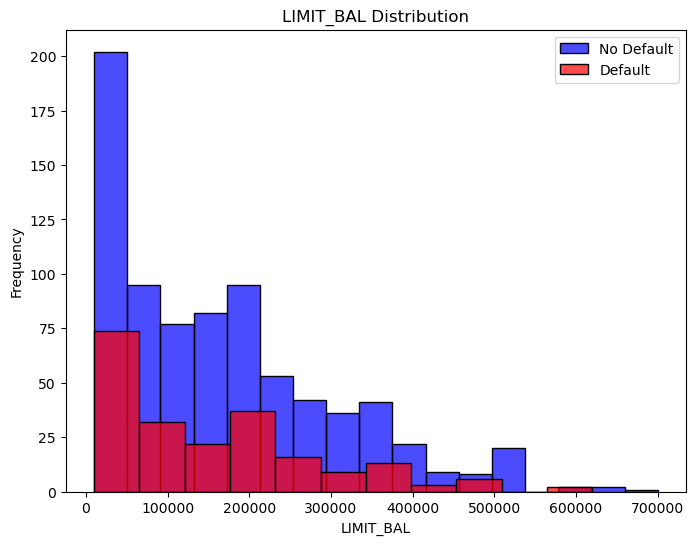

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame named 'credit'
# If not, you can load it using pd.read_csv()

# Separate data into default and non-default cases
df_default = credit[credit['default payment next month'] == 1]
df_no_default = credit[credit['default payment next month'] == 0]

# Specify the field for visualization
x_field = 'LIMIT_BAL'

# Set the title for the plot
title = 'LIMIT_BAL Distribution'

# Plot the distribution using seaborn
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(round(df_no_default[x_field], 0), kde=False, label='No Default', color='blue', alpha=0.7)
sns.histplot(round(df_default[x_field], 0), kde=False, label='Default', color='red', alpha=0.7)

# Set title and labels
plt.title(title)
plt.xlabel(x_field)
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Show plot
plt.show()


/tmp/ipykernel_108/2023673981.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(round(df_0[x_field],0), kde=False, label = 'No Default')
/tmp/ipykernel_108/2023673981.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(round(df_1[x_field],0), kde=False, label = 'Default')


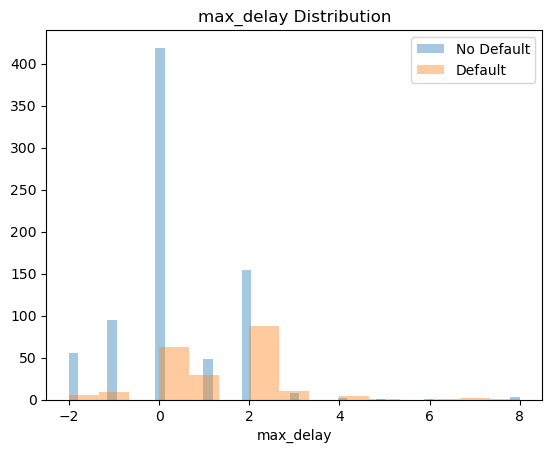

In [16]:
df_1 = credit[credit['default payment next month'] == 1]
df_0 = credit[credit['default payment next month'] == 0]
x_field = 'max_delay'
title = 'max_delay Distribution'
#plt.xlim(-1, 2) 
ax = sns.distplot(round(df_0[x_field],0), kde=False, label = 'No Default')
ax = sns.distplot(round(df_1[x_field],0), kde=False, label = 'Default')
ax.set_title(title)
plt.legend()

<AxesSubplot: xlabel='limit_1000'>

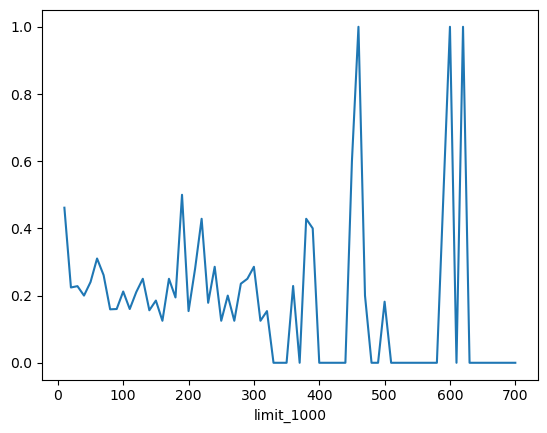

In [17]:
credit["limit_1000"]=credit["LIMIT_BAL"]/1000
(credit.groupby('limit_1000')['default payment next month'].sum() / credit.groupby('limit_1000')['default payment next month'].count()).plot()

In [ ]:
credit.groupby('PAY_1')['default payment next month'].count().plot()


In [ ]:
credit[['AGE','EDUCATION','MARRIAGE','LIMIT_BAL',
        'BILL_AMT1','BILL_AMT2','BILL_AMT3',
        'BILL_AMT4','BILL_AMT5','PAY_1','PAY_2','PAY_3',
        'PAY_4','PAY_5','PAY_6']].hist(figsize=(10, 10),color=("c"))


In [68]:
print(credit.groupby('default payment next month')[['Total_Delays','Three_Months_Delays',
                                 'Total_Roll','Three_Months_Roll',
                                 'mean_trend','mean_trend_3_months',
                                 'Deviation','Deviation_3_months',
                                 'mean_pay_from_Bill',
                                 'count_out_of_bill','count_out_of_bill_3_months']].agg(['mean','min','max']).T)

default payment next month               0          1
Total_Delays               mean   0.571792   1.771028
                           min    0.000000   0.000000
                           max    6.000000   6.000000
Three_Months_Delays        mean   0.348158   1.121495
                           min    0.000000   0.000000
                           max    3.000000   3.000000
Total_Roll                 mean   3.254130   2.467290
                           min    0.000000   0.000000
                           max    6.000000   6.000000
Three_Months_Roll          mean   1.620076   1.098131
                           min    0.000000   0.000000
                           max    3.000000   3.000000
mean_trend                 mean  -0.559848  -0.226168
                           min   -2.000000  -2.000000
                           max    3.000000   6.000000
mean_trend_3_months        mean  -0.653113  -0.336449
                           min   -2.000000  -2.000000
                           m

/tmp/ipykernel_131/380549351.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1137: RuntimeWarning: invalid value encountered in sqrt
  size = np.sqrt(val)


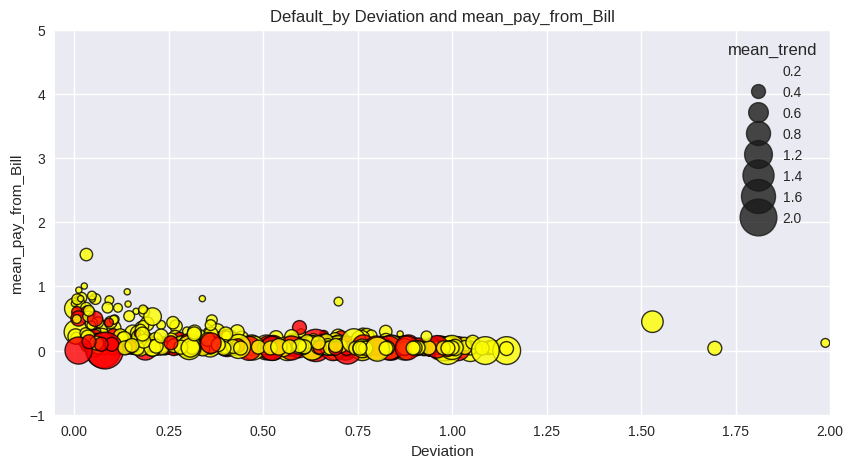

In [71]:
fig = plt.figure(figsize=(10, 5))#, dpi=80)
ax = fig.gca()
plt.style.use('seaborn')
ss1=[(s+1)*100 for s in credit['mean_trend']]
cs= credit['default payment next month'].replace(1,'red').replace(0,'yellow')
scatter=ax.scatter(x='Deviation', y='mean_pay_from_Bill',data=credit,s=ss1,c=cs,alpha=0.8,edgecolor='black',linewidth=1)

handles, labels=scatter.legend_elements(prop='sizes')
labels = sorted(credit[credit.mean_trend > 0]['mean_trend'].unique())

plt.legend(handles,labels,title='mean_trend')

ax.set_ylim((-1,5))
ax.set_xlim((-0.05,2))
ax.set_xlabel('Deviation')
ax.set_ylabel('mean_pay_from_Bill')
ax.set_title('Default_by {} and {}'.format('Deviation','mean_pay_from_Bill'))
plt.show()

/tmp/ipykernel_131/726040718.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1137: RuntimeWarning: invalid value encountered in sqrt
  size = np.sqrt(val)


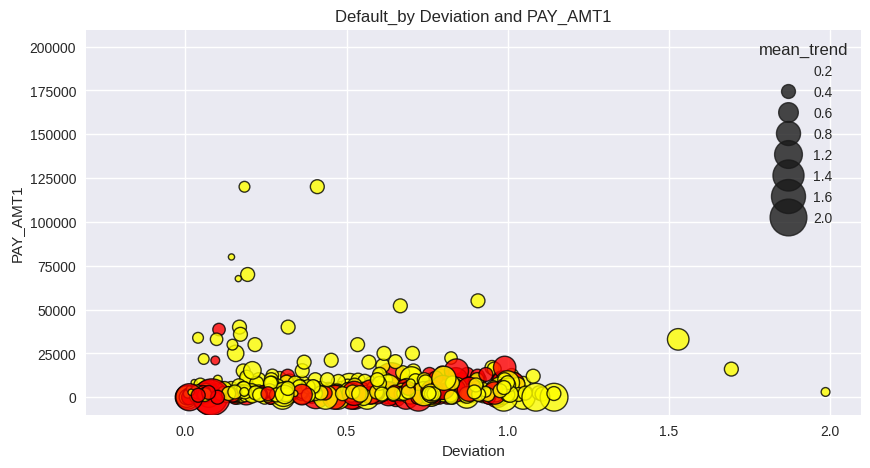

In [72]:
fig = plt.figure(figsize=(10, 5))#, dpi=80)
ax = fig.gca()
plt.style.use('seaborn')
credit_p=credit[(credit.PAY_AMT1<350000)&(credit.Deviation<3)]
ss1=[(s+1)*100 for s in credit_p['mean_trend']]
cs= credit_p['default payment next month'].replace(1,'red').replace(0,'yellow')

scatter=ax.scatter(x='Deviation', y='PAY_AMT1',data=credit_p,s=ss1,c=cs,alpha=0.8,edgecolor='black',linewidth=1)

handles, labels=scatter.legend_elements(prop='sizes')
labels = sorted(credit_p[credit_p.mean_trend > 0]['mean_trend'].unique())

plt.legend(handles,labels,title='mean_trend')

ax.set_xlabel('Deviation')
ax.set_ylabel('PAY_AMT1')
ax.set_title('Default_by {} and {}'.format('Deviation','PAY_AMT1'))
plt.show()


/tmp/ipykernel_131/3916966617.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


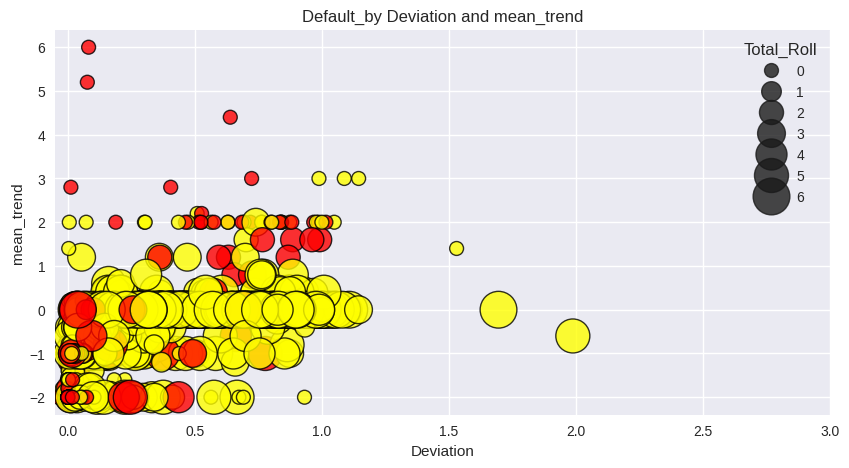

In [73]:
fig = plt.figure(figsize=(10, 5))#, dpi=80)
ax = fig.gca()
plt.style.use('seaborn')
ss = (credit['Total_Roll']+1)*100
cs= credit['default payment next month'].replace(1,'red').replace(0,'yellow')

scatter=ax.scatter(x='Deviation', y='mean_trend',data=credit,s=ss,c=cs,alpha=0.8,edgecolor='black',linewidth=1)
handles, labels=scatter.legend_elements(prop='sizes')
labels=['0','1','2','3','4','5','6']
plt.legend(handles,labels,title='Total_Roll')

#ax.set_ylim((-1,2))
ax.set_xlim((-0.05,3))
ax.set_xlabel('Deviation')
ax.set_ylabel('mean_trend')
ax.set_title('Default_by {} and {}'.format('Deviation','mean_trend'))
plt.show()


Text(1, 1.1, 'default_Total_Roll')

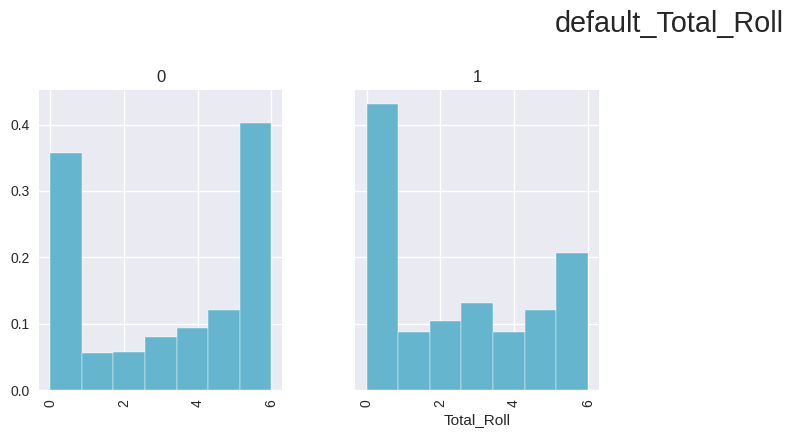

In [75]:
credit.hist(column='Total_Roll',by='default payment next month',color='c',sharex=True,sharey=True,figsize=(7,4),bins=7,histtype='bar',density='True')
plt.xlabel('Total_Roll')
plt.suptitle('default_Total_Roll', x=1, y=1.1, ha='center', fontsize='xx-large')

Text(0.5, 1.1, 'default_mean_trend_3_months')

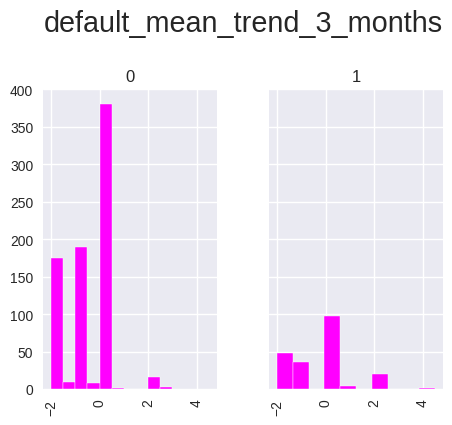

In [76]:
# default deviation by default (1 or 0)
credit.hist(column='mean_trend_3_months',by='default payment next month',bins=10,color='magenta',sharex=True,sharey=True,figsize=(5,4),histtype='bar')
plt.suptitle('default_mean_trend_3_months', x=.5, y=1.1, ha='center', fontsize='xx-large')


<Figure size 1500x400 with 0 Axes>

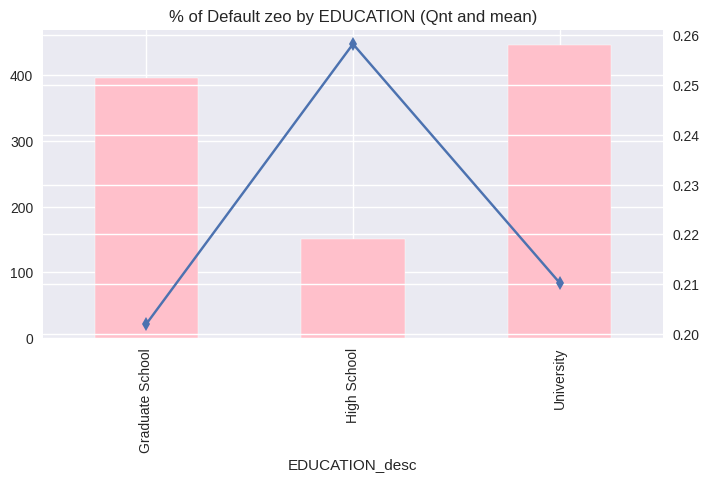

<Figure size 1500x400 with 0 Axes>

In [77]:
education_percent=credit[(credit.EDUCATION_desc == "Graduate School") | (credit.EDUCATION_desc == "High School") |  (credit.EDUCATION_desc == "University")].groupby('EDUCATION_desc')['default payment next month'].sum()/ credit[(credit.EDUCATION_desc == "Graduate School") | (credit.EDUCATION_desc == "High School") |  (credit.EDUCATION_desc == "University")].groupby('EDUCATION_desc')['default payment next month'].count()

fig, ax1 = plt.subplots(figsize=(8, 4))

education_percent.plot(secondary_y=True, marker='d')
credit[(credit.EDUCATION_desc == "Graduate School") | (credit.EDUCATION_desc == "High School") |  (credit.EDUCATION_desc == "University")].groupby('EDUCATION_desc')['default payment next month'].count().plot(kind='bar',color="pink")

plt.title("% of Default zeo by EDUCATION (Qnt and mean)")
plt.figure(figsize=(15,4))

In [78]:
corr = credit.corr()
corr['default payment next month'].sort_values(ascending=False)

/tmp/ipykernel_131/54223596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = credit.corr()


default payment next month    1.000000
Three_Months_Delays           0.341250
Total_Delays                  0.321813
metric_prep_1                 0.318478
PAY_LM                        0.318478
                                ...   
Roll_PAY_3                   -0.114354
Roll_PAY_2                   -0.118263
Total_Roll                   -0.127392
Three_Months_Roll            -0.153941
Roll_PAY_1                   -0.195823
Name: default payment next month, Length: 67, dtype: float64

/tmp/ipykernel_131/3108947322.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot: >

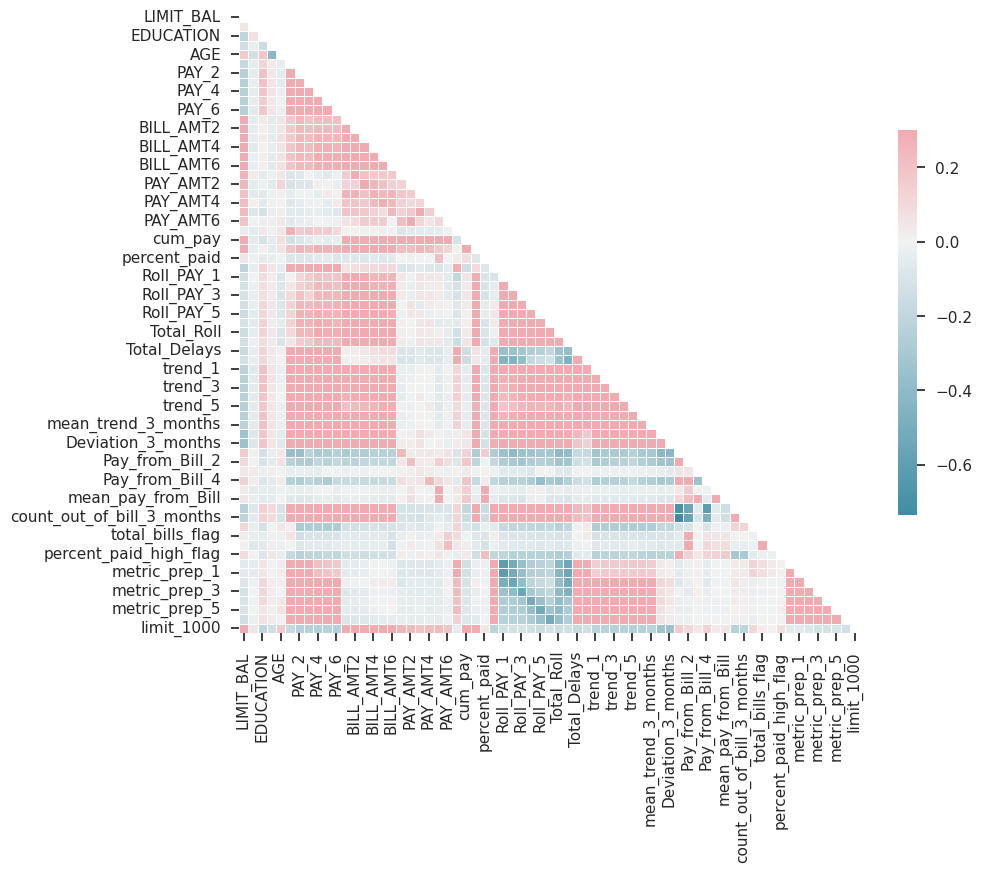

In [79]:
sns.set(style="ticks") #white, dark, whitegrid, darkgrid, ticks
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, s=80, l=55, n=9,as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 0.7, '')

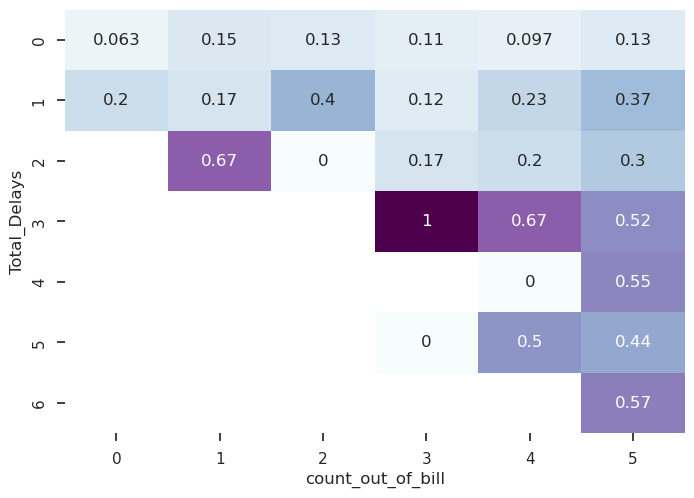

In [80]:
delays_pay1_percent = credit.groupby(['Total_Delays','count_out_of_bill'])['default payment next month'].sum() / credit.groupby(['Total_Delays','count_out_of_bill'])['default payment next month'].count()
delays_pay1_percent = delays_pay1_percent.to_frame()
delays_pay1_percent.rename(columns={"default payment next month":"LIMIT_BAL"},inplace=True)
delays_pay1_percent.reset_index(level=[0,1], inplace=True)

sns.heatmap(pd.crosstab(delays_pay1_percent.Total_Delays, delays_pay1_percent.count_out_of_bill, values=delays_pay1_percent.LIMIT_BAL, aggfunc='mean'),cmap="BuPu", annot=True, cbar=False)

plt.title('',x=0.5, y=0.7, ha='center',fontsize='xx-large')

In [81]:
X = credit_rank.drop('default payment next month', axis=1)
y = credit_rank['default payment next month']

In [82]:
num_X = X.select_dtypes(include=[np.number])

# We chose variance of 5% as indicator
selector = VarianceThreshold(0.02)
selector.fit_transform(num_X)

# The new df without dropped the fields
new_columns = num_X.columns[selector.get_support()]
new_num_X = num_X[new_columns]

# Suggested fields to remove
print("These are the fields the VarianceThreshold suggested to remove:\n")
print(set(new_num_X.columns)^set(credit_rank.drop(['default payment next month'],axis=1).columns))

These are the fields the VarianceThreshold suggested to remove:

{'EDUCATION_desc', 'MARRIAGE_desc', 'con_3_months', 'Rate_key', 'con', 'percent_paid_flag', 'SEX_desc', 'score_rate', 'total_bills_flag'}


In [83]:
print("Checking  default precentages for the suggested fields to remove:\n")
print(credit_rank.groupby('LIMIT_BAL')['default payment next month'].sum() / credit_rank.groupby('LIMIT_BAL')['default payment next month'].count())
print("\n-------------------------------\n")

Checking  default precentages for the suggested fields to remove:

LIMIT_BAL
10000     0.461538
20000     0.224138
30000     0.228070
40000     0.200000
50000     0.240310
60000     0.310345
70000     0.260870
80000     0.159091
90000     0.160000
100000    0.212121
110000    0.160000
120000    0.210526
130000    0.250000
140000    0.156250
150000    0.185185
160000    0.125000
170000    0.250000
180000    0.194444
190000    0.500000
200000    0.153846
210000    0.280000
220000    0.428571
230000    0.178571
240000    0.285714
250000    0.125000
260000    0.200000
270000    0.125000
280000    0.235294
290000    0.250000
300000    0.285714
310000    0.125000
320000    0.153846
330000    0.000000
340000    0.000000
350000    0.000000
360000    0.228571
370000    0.000000
380000    0.428571
390000    0.400000
400000    0.000000
410000    0.000000
420000    0.000000
440000    0.000000
450000    0.600000
460000    1.000000
470000    0.200000
480000    0.000000
490000    0.000000
500000    0

In [84]:
f_x=X[['trend_1','mean_trend','LIMIT_BAL']]
#f_x=X[X.columns[[0,1,2,3,4,5,11,15,16,17,18,19,20,23,24,25,26,27,28,29]]] # maybe pay1 and mean_trend trend1 are categogial with minus we have to scale to delete the minus
f_x.head()

fclass=f_classif(f_x,y)
p_values1=pd.Series(fclass[1],index=f_x.columns)
p_values1.sort_values(ascending=True,inplace=True)

print("List of quntity fields with sorted P_value grades:\n")
print(p_values1)

List of quntity fields with sorted P_value grades:

mean_trend    0.000034
trend_1       0.000328
LIMIT_BAL     0.228193
dtype: float64


In [85]:
chi_x=X[['Total_Delays','Three_Months_Delays','Total_Roll','Three_Months_Roll','count_out_of_bill','count_out_of_bill_3_months']]#,'trend_1','mean_trend']]
#chi_x=X[X.columns[[7,8,9,10,11,21,22,30,31,32,33,34,35,36,37,38,39,40,41,42]]]
chis2=chi2(chi_x,y)

p_values=pd.Series(chis2[1],index=chi_x.columns)
p_values.sort_values(ascending=True,inplace=True)

print("List of categorial fields with sorted P_value grades:\n")
p_values

List of categorial fields with sorted P_value grades:



Total_Delays                  1.669436e-65
Three_Months_Delays           1.591656e-44
Total_Roll                    6.249514e-09
Three_Months_Roll             3.542255e-08
count_out_of_bill             2.101656e-03
count_out_of_bill_3_months    1.042383e-02
dtype: float64

In [86]:
X.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,percent_paid_high_flag,PAY_LM,metric_prep_1,metric_prep_2,metric_prep_3,metric_prep_4,metric_prep_5,metric_prep_6,Rate_key,score_rate
0,50000,1,2,1,57,-1,0,-1,0,0,...,0,1.4,1.4,1.0,1.4,1.0,1.0,1.0,1.4;1.0;1.4;1.0;1.0;1.0,Rate_2
1,50000,1,1,2,37,0,0,0,0,0,...,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0;1.0;1.0;1.0;1.0;1.0,Rate_1
2,500000,1,1,2,29,0,0,0,0,0,...,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0;1.0;1.0;1.0;1.0;1.0,Rate_1
3,100000,2,2,2,23,0,-1,-1,0,0,...,1,1.0,1.0,1.4,1.4,1.0,1.0,1.4,1.0;1.4;1.4;1.0;1.0;1.4,Rate_2
4,140000,2,3,1,28,0,0,2,0,0,...,0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0;1.0;3.0;1.0;1.0;1.0,Rate_3


In [87]:
X = credit_rank.drop('default payment next month', axis=1)
y = credit_rank['default payment next month']



In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains your features
# Assuming 'y' contains your target variable

# Filter numeric columns
numeric_columns = X.select_dtypes(include=np.number).columns

# Select only numeric columns from X
selected = X[numeric_columns]

# Using Feature Scaling
scaler = StandardScaler().fit(selected)
selected_scaled = pd.DataFrame(scaler.transform(selected), columns=selected.columns)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(selected_scaled, y, test_size=0.3, random_state=42)


In [89]:
log_reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=12345,
                   max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None,solver='newton-cg')

# fitting X_train and y_train
logistic=log_reg.fit(X_train, y_train)


In [90]:
print("coef=",list(logistic.coef_))
print("\n******************************\n")
print(selected.columns)
print("\n*******************************\n")
print("intercept= ",logistic.intercept_)

coef= [array([-0.11864548, -0.05313872,  0.13542256, -0.07972637,  0.02896931,
        0.29169282, -0.44447462,  0.0124287 ,  0.26189692, -0.31150234,
       -0.54163288, -0.29350462,  0.13657284,  0.60025737, -0.96700792,
        0.18984811,  0.43891578, -0.07865633, -0.17336973,  0.13609841,
        0.0249391 , -0.10395598,  0.15389131, -0.09249995,  0.07783913,
       -0.08153882,  0.18596761, -1.01610306,  1.16945877, -0.53015249,
        0.55311077,  0.14402031, -0.40750489, -0.01756286, -0.13543513,
        0.3805867 ,  0.4028982 , -0.3842835 ,  0.77552162, -0.68762671,
        1.21792201, -0.54163288,  0.07327761,  0.21475851, -0.77753678,
        0.48225373, -0.06644525, -0.38650397,  0.08228605, -0.06521266,
        0.11629697,  0.11515974,  0.21881216, -0.41413909,  0.17356866,
        0.03420554,  0.30179217,  0.03088007, -0.17930832, -0.17930832,
        0.41264056, -0.63595588,  0.20179229,  0.316715  , -0.30265468])]

******************************

Index(['LIMIT_BAL', 'S

In [91]:
Logistic_CV = StratifiedShuffleSplit(n_splits=7, train_size=0.7, test_size=0.3)

# We chose to use roc_auc score for testing our model
scores = cross_val_score(logistic, X_train, y_train, cv=Logistic_CV, scoring='roc_auc')

# The 7 cross validation scores
print("Scores : " + (7 * " {:.3f} ").format( *scores))

# mean score of the 7 cross validation
mean_scores = "%.3f" % stat.mean(scores)
print("Mean Scores: " ,mean_scores)

Scores :  0.682  0.746  0.765  0.708  0.712  0.652  0.660 
Mean Scores:  0.704


In [92]:
y_train_pred = logistic.predict(X_train)

In [93]:
y_test_pred = logistic.predict(X_test)

In [94]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
pd.DataFrame(cm, 
             index=log_reg.classes_, 
             columns=log_reg.classes_)

,0,1
0,202,49
1,25,25


In [46]:
print(classification_report(y_true=y_test,y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85       251
           1       0.34      0.50      0.40        50

    accuracy                           0.75       301
   macro avg       0.61      0.65      0.62       301
weighted avg       0.80      0.75      0.77       301



In [95]:
y_test_pred_proba = pd.DataFrame(logistic.predict_proba(X_test), columns=logistic.classes_)

# Checking rows our model predicted as default 0 but actualy are deault 1
AA=y_test_pred_proba.join(X_test).join(y_test)
AA

,0,1,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,percent_paid_flag,percent_paid_high_flag,PAY_LM,metric_prep_1,metric_prep_2,metric_prep_3,metric_prep_4,metric_prep_5,metric_prep_6,default payment next month
0,0.419843,0.580157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.774555,0.225445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.594488,0.405512,2.547201,-1.198133,-1.040545,0.743573,-0.645139,0.004259,0.131777,0.130632,...,-0.063341,-0.250265,-0.645451,-0.645451,-0.526501,-0.543972,-0.478963,-0.481809,-0.513059,0.0
3,0.685285,0.314715,-0.517400,0.834632,0.363209,0.743573,-1.296240,0.004259,-0.682477,-0.661869,...,-0.063341,3.995760,-0.645451,-0.645451,-0.046840,-0.053859,-0.478963,-0.481809,0.000385,0.0
4,0.533101,0.466899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.901476,0.098524,-0.517400,-1.198133,0.363209,0.743573,0.222996,0.004259,0.131777,0.130632,...,-0.063341,-0.250265,-0.645451,-0.645451,-0.526501,-0.543972,-0.478963,-0.481809,-0.513059,0.0
297,0.743594,0.256406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,0.973695,0.026305,-0.900475,0.834632,1.766964,-1.136015,0.548547,0.004259,0.131777,0.130632,...,-0.063341,-0.250265,-0.645451,-0.645451,-0.526501,-0.543972,-0.478963,-0.481809,-0.513059,0.0
299,0.417860,0.582140,-1.130321,0.834632,-1.040545,0.743573,-1.079207,0.004259,0.131777,1.715634,...,-0.063341,-0.250265,-0.645451,-0.645451,-0.526501,1.906596,-0.478963,-0.481809,-0.513059,1.0


In [96]:
y_test_desc = y_test.replace(1,'default').replace(0,'no-default')

scores = logistic.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, thresholds_log = roc_curve(y_test_desc, scores, pos_label='default')
res_LR = pd.DataFrame({'FPR': fpr_log, 'TPR': tpr_log, 'Threshold': thresholds_log})
res_LR[['TPR', 'FPR', 'Threshold']][::200]

,TPR,FPR,Threshold
0,0.0,0.0,1.990336


(0.0, 1.0)

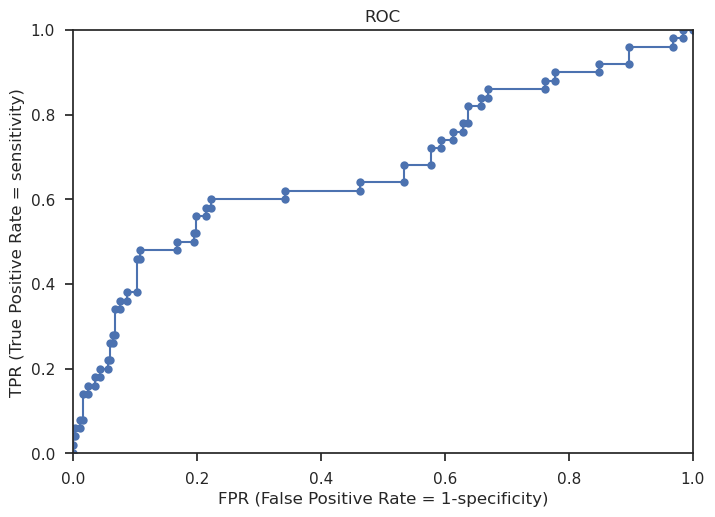

In [97]:
plt.plot(fpr_log, tpr_log, '-o')
plt.title('ROC')
plt.xlabel('FPR (False Positive Rate = 1-specificity)')
plt.ylabel('TPR (True Positive Rate = sensitivity)')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [98]:
round(roc_auc_score(y_test_desc=='default', scores),4)

0.6782

In [99]:
## using knn agorithm find the classfication of credit card s


X = credit_rank.drop('default payment next month', axis=1)
y = credit_rank['default payment next month']


In [100]:
selected=X[['Three_Months_Delays','LIMIT_BAL','Total_Delays','count_out_of_bill',	'mean_trend','max_delay']]

# Using Feature Scaling 
Scaler = StandardScaler().fit(selected)
selected_Scaled = pd.DataFrame(Scaler.transform(selected), columns=selected.columns)

# Splitting data to train and testselected_Scaled
X_train, X_test, y_train, y_test = split(selected_Scaled,y,train_size=0.7,random_state=12345,stratify=y) # selected instead of X

In [101]:
KNN = KNeighborsClassifier(metric='minkowski', n_neighbors= 500, p= 1)

# fitting X_train and y_train
KNN_fit = KNN.fit(X_train, y_train)

In [104]:
y_train_pred = KNN_fit.predict(X_train)


In [105]:
y_test_pred = KNN_fit.predict(X_test)


In [106]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
pd.DataFrame(cm, 
             index=KNN_fit.classes_, 
             columns=KNN_fit.classes_)

,0,1
0,237,0
1,64,0


In [107]:
print(classification_report(y_true=y_test,y_pred=y_test_pred))


              precision    recall  f1-score   support

           0       0.79      1.00      0.88       237
           1       0.00      0.00      0.00        64

    accuracy                           0.79       301
   macro avg       0.39      0.50      0.44       301
weighted avg       0.62      0.79      0.69       301



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
round(accuracy_score(y_true=y_test,y_pred=y_test_pred),3)


0.787

In [109]:
y_test_pred_proba = pd.DataFrame(KNN_fit.predict_proba(X_test), columns=KNN_fit.classes_)

# Checking rows our model predicted as default 0 but actualy are deault 1
AA=y_test_pred_proba.join(X_test).join(y_test)
AA.head()

,0,1,Three_Months_Delays,LIMIT_BAL,Total_Delays,count_out_of_bill,mean_trend,max_delay,default payment next month
0,0.848,0.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.852,0.148,-0.552678,-0.900475,-0.542075,0.65899,0.466613,-0.347166,0.0
2,0.854,0.146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.846,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.842,0.158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
y_test_desc = y_test.replace(1,'default').replace(0,'no-default')

scores = KNN_fit.predict_proba(X_test)[:, 1]

fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test_desc, scores, pos_label='default')
res_KNN = pd.DataFrame({'FPR': fpr_KNN, 'TPR': tpr_KNN, 'Threshold': thresholds_KNN})
res_KNN[['TPR', 'FPR', 'Threshold']]

,TPR,FPR,Threshold
0,0.000000,0.000000,1.258
1,0.031250,0.000000,0.258
2,0.031250,0.004219,0.256
3,0.093750,0.012658,0.254
4,0.125000,0.046414,0.252
5,0.234375,0.059072,0.250
6,0.250000,0.067511,0.248
7,0.265625,0.067511,0.246
8,0.281250,0.071730,0.244
9,0.296875,0.071730,0.242


(0.0, 1.0)

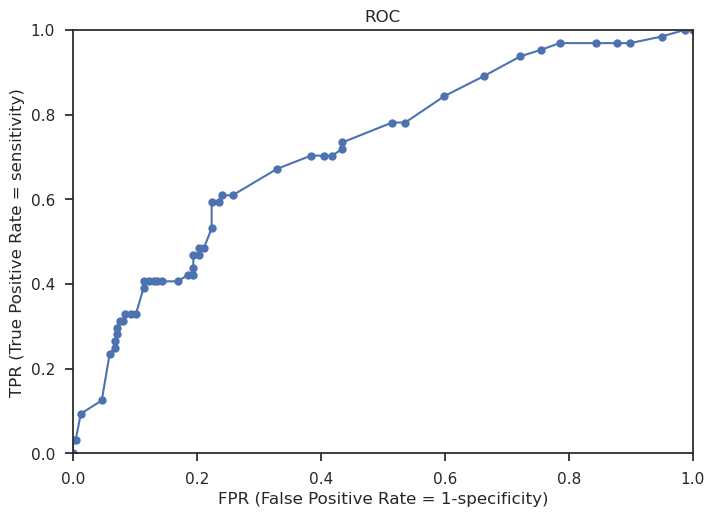

In [111]:
plt.plot(fpr_KNN, tpr_KNN, '-o')
plt.title('ROC')
plt.xlabel('FPR (False Positive Rate = 1-specificity)')
plt.ylabel('TPR (True Positive Rate = sensitivity)')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [112]:
round(roc_auc_score(y_test_desc=='default', scores),3)


0.719

(0.0, 1.0)

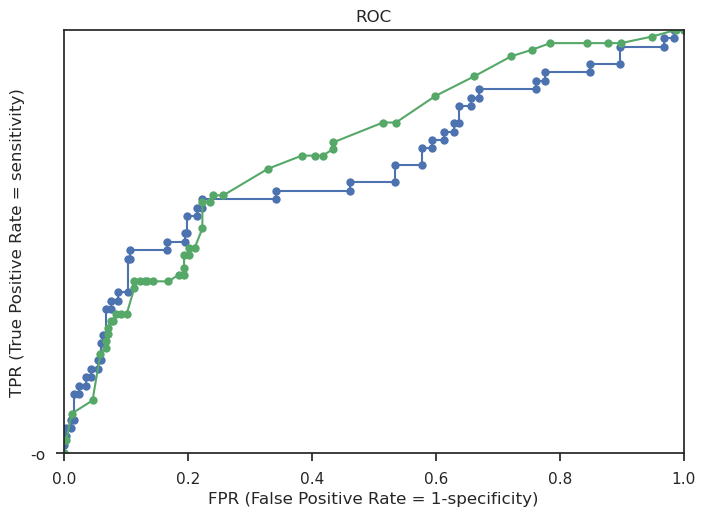

In [113]:
plt.plot(fpr_log, tpr_log, '-o')
plt.plot('-o')
plt.plot(fpr_KNN, tpr_KNN, '-o')
plt.title('ROC')
plt.xlabel('FPR (False Positive Rate = 1-specificity)')
plt.ylabel('TPR (True Positive Rate = sensitivity)')
plt.xlim([0, 1])
plt.ylim([0, 1])